In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [17]:
# Data directories and paths
input_data_dir = 'input_data'
output_data_dir = 'output_data'
data_date = "2018-01-01"
data_time = "12:00"
input_name = "input_surface"
output_name = "output_surface"

In [18]:
# Load input data
input_path = os.path.join(input_data_dir, data_date, data_time, f"{input_name.replace('/', '_')}.npy")
input_data = np.load(input_path)  
input_data = input_data[3]  

# Load output data
output_path = os.path.join(output_data_dir, data_date, data_time, f"{output_name.replace('/', '_')}.npy")
output_data = np.load(output_path)  
output_data = output_data[3]  

In [19]:
# Set up longitudes and latitudes
lons = np.linspace(0, 360, 1440)
lons_shifted = np.where(lons > 180, lons - 360, lons)
lats = np.linspace(90, -90, 721)

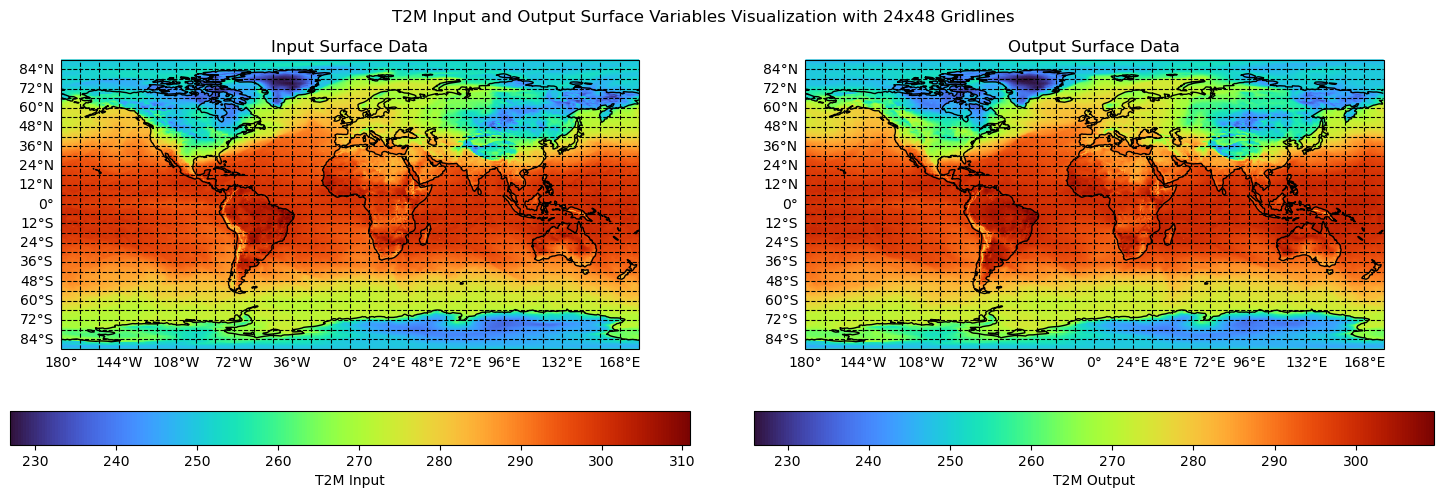

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})

ax = axs[0]
ax.coastlines()
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
im = ax.pcolormesh(lons_shifted, lats, input_data, cmap='turbo', transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, orientation='horizontal', label='T2M Input')
ax.set_title('Input Surface Data')

ax = axs[1]
ax.coastlines()
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
im = ax.pcolormesh(lons_shifted, lats, output_data, cmap='turbo', transform=ccrs.PlateCarree())
plt.colorbar(im, ax=ax, orientation='horizontal', label='T2M Output')
ax.set_title('Output Surface Data')

window_lat_size = 24
window_lon_size = 48
lon_grid_lines = np.arange(-180, 180.1, 360 / (1440/window_lon_size))  
lat_grid_lines = np.arange(-90, 90.1, 180 / (720/window_lat_size))  

for ax in axs:
    gridlines = ax.gridlines(xlocs=lon_grid_lines, ylocs=lat_grid_lines, color='black', linestyle='--', draw_labels=True)
    gridlines.right_labels = False
    gridlines.top_labels = False

plt.suptitle('T2M Input and Output Surface Variables Visualization')

plt.tight_layout()
plt.show()

In [21]:
path = os.path.join(input_data_dir, data_date, data_time, f"{input_name.replace('/', '_')}.npy")
input_surface = np.load(path)

In [22]:
patch_size_lat = 4
patch_size_lon = 4

chunk_size_lat = 24
chunk_size_lon = 48

lat_index = 6
lon_index = 29

lat_start = lat_index * chunk_size_lat
lat_end = lat_start + chunk_size_lat
lon_start = lon_index * chunk_size_lon
lon_end = lon_start + chunk_size_lon

lat_end = min(lat_end, input_surface.shape[1])
lon_end = min(lon_end, input_surface.shape[2])

In [23]:
surface_var_idx = {
    "MSLP": 0,
    "U10": 1,
    "V10": 2,
    "T2M": 3,
}

weather_var = "T2M"

In [24]:
chunk_data = input_surface[surface_var_idx[weather_var], lat_start:lat_end, lon_start:lon_end]

In [25]:
latitudes = np.linspace(90, -90, 721)[lat_start:lat_end]
longitudes = np.linspace(0, 359.75, 1440)[lon_start:lon_end]

lat_spacing = np.abs(latitudes[1] - latitudes[0])
lon_spacing = np.abs(longitudes[1] - longitudes[0])

lat_shifted = latitudes - lat_spacing / 2
lon_shifted = longitudes - lon_spacing / 2

lon_grid, lat_grid = np.meshgrid(lon_shifted, lat_shifted)

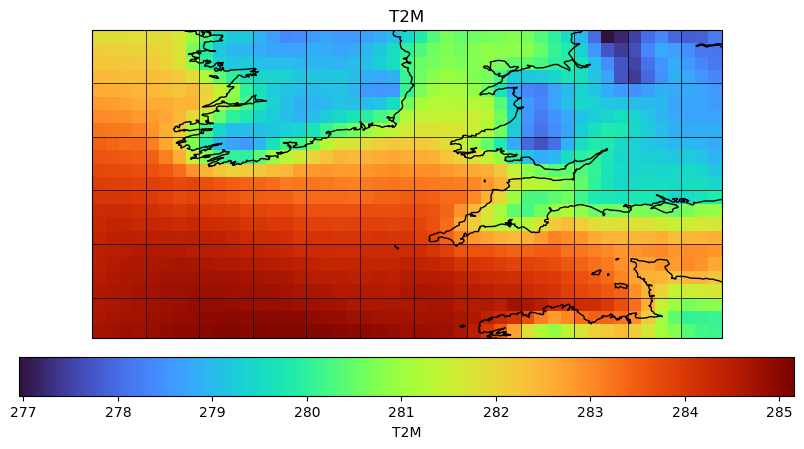

In [26]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)

im = ax.pcolormesh(lon_grid, lat_grid, chunk_data, cmap='turbo', transform=ccrs.PlateCarree())

plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, label=weather_var)

for i in range(lat_start, lat_end, patch_size_lat):
    ax.plot([longitudes.min(), longitudes.max()], [latitudes[i - lat_start], latitudes[i - lat_start]], color='black', linewidth=0.5, transform=ccrs.PlateCarree())

for j in range(lon_start, lon_end, patch_size_lon):
    ax.plot([longitudes[j - lon_start], longitudes[j - lon_start]], [latitudes.min(), latitudes.max()], color='black', linewidth=0.5, transform=ccrs.PlateCarree())

plt.title(weather_var)
plt.show()

In [27]:
layer_name = "/b1/Add_output_0"

head = 0

win_lat_pl = 6
win_lon = 29

In [28]:
path = os.path.join(output_data_dir, data_date, data_time, f"{layer_name.replace('/', '_')}.npy")
attention_output = np.load(path)

In [29]:
attention_filtered = attention_output[win_lon, win_lat_pl, head, :, :]

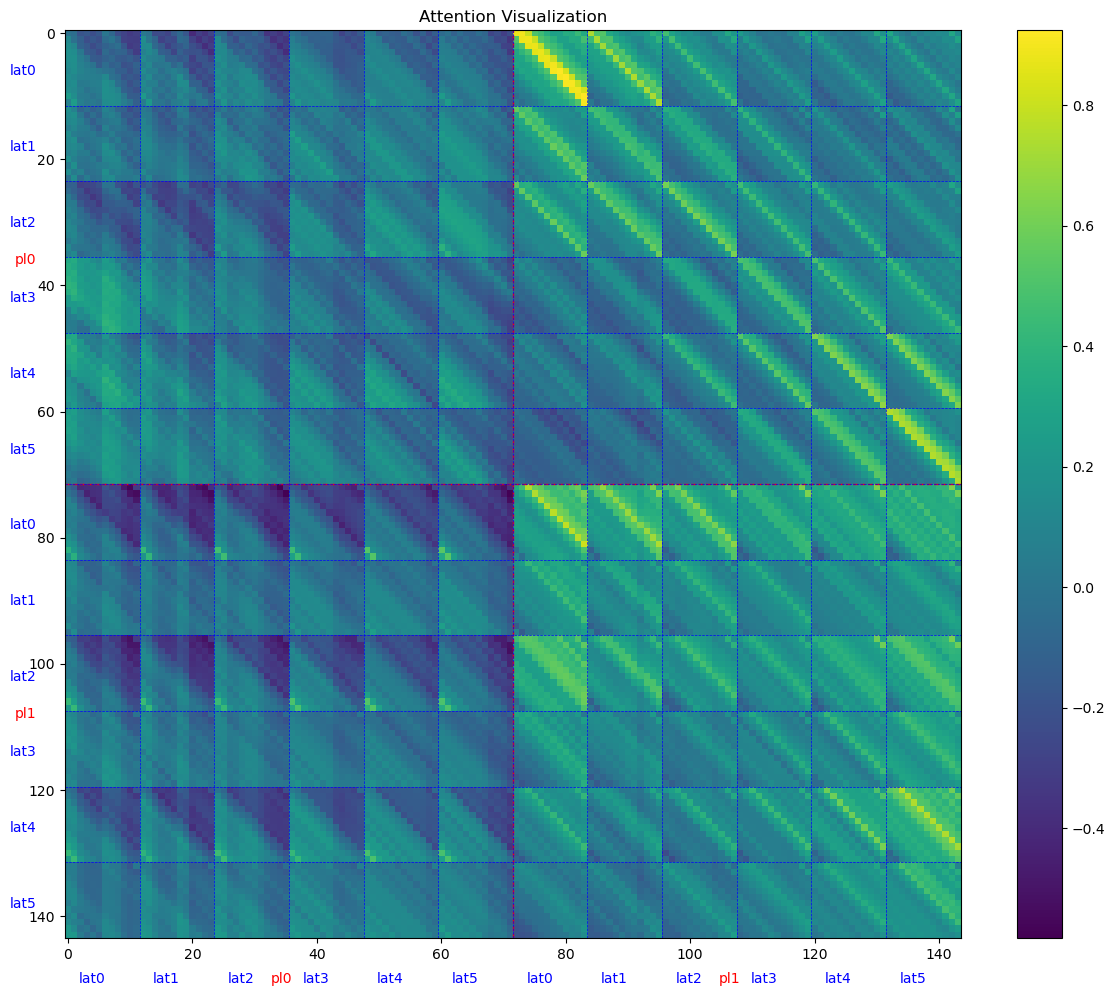

In [30]:
pressure_levels = [0, 1]  # Example pressure levels
latitudes = [f"lat{i}" for i in range(6)]  # Example latitude labels
longitudes = [f"lon{j}" for j in range(12)]  # Example longitude labels

pl_colour = "red"
lat_colour = "blue"
lon_colour = "green"

labels = []
for p in pressure_levels:
    for lat in latitudes:
        for lon in longitudes:
            labels.append(f"P{p}_{lat}_{lon}")

plt.figure(figsize=(12, 10))
plt.imshow(attention_filtered, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Attention Visualization')

for i in range(1, len(pressure_levels)):
    plt.axhline(y=i*72-0.5, color=pl_colour, linestyle='--', linewidth=1)  
    plt.axvline(x=i*72-0.5, color=pl_colour, linestyle='--', linewidth=1) 

for i in range(1, len(latitudes) * len(pressure_levels)):
    plt.axhline(y=i*12-0.5, color=lat_colour, linestyle='--', linewidth=0.5)
    plt.axvline(x=i*12-0.5, color=lat_colour, linestyle='--', linewidth=0.5)

for i, pl in enumerate(pressure_levels):
    plt.text(-5, i*72 + 36, f'pl{pl}', color=pl_colour, fontsize=10, ha='right', va='center')
    plt.text(i*72 + 36, 150, f'pl{pl}', color=pl_colour, fontsize=10, ha='right', va='center')
    for j, lat in enumerate(latitudes):
        plt.text(-5, (i * 6*12) + j*12 + 6, f'{lat}', color=lat_colour, fontsize=10, ha='right', va='center')
        plt.text((i * 6*12) + j*12 + 6, 150, f'{lat}', color=lat_colour, fontsize=10, ha='right', va='center')

plt.tight_layout()
plt.show()